<a href="https://colab.research.google.com/github/Aditya-1794/MIT_IEEE_URTC_2025_Alzheimer-s_Detection_Research/blob/main/Research_2025_Alzheimer'sDetection_MAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Initialization

##Importing resources

In [ ]:
import kagglehub

# Download latest version of main training dataset
path = kagglehub.dataset_download("pulavendranselvaraj/oasis-dataset")

print("Path to dataset 1 files:", path)

Using Colab cache for faster access to the 'oasis-dataset' dataset.
Path to dataset 1 files: /kaggle/input/oasis-dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
import PIL
from PIL import Image
import os
import cv2
import pandas as pd
import numpy as pd
import tensorflow as tf
from keras.layers import Conv2D,Flatten, Dense, Dropout, BatchNormalization ,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping , ModelCheckpoint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm

##Organizing images

In [ ]:
non_demented=[]
very_mild_demented= []
mild_demented =[]
moderate_demented =[]

for dirname, _, filenames in os.walk('/kaggle/input/oasis-dataset/input/Non Demented'):
    for filename in filenames:
        non_demented.append(os.path.join(dirname, filename))


for dirname, _, filenames in os.walk('/kaggle/input/oasis-dataset/input/Very mild Dementia'):
    for filename in filenames:
        very_mild_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/kaggle/input/oasis-dataset/input/Mild Dementia'):
    for filename in filenames:
        mild_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/kaggle/input/oasis-dataset/input/Moderate Dementia'):
    for filename in filenames:
        moderate_demented.append(os.path.join(dirname, filename))

In [ ]:
images = []
labels = []
for subfolder in tqdm(os.listdir('/kaggle/input/oasis-dataset')):
    subfolder_path = os.path.join('/kaggle/input/oasis-dataset', subfolder)
    for folder in os.listdir(subfolder_path):
        subfolder_path2=os.path.join(subfolder_path,folder)
        for image_filename in os.listdir(subfolder_path2):
            image_path = os.path.join(subfolder_path2, image_filename)
            images.append(image_path)
            labels.append(folder)

100%|██████████| 1/1 [00:00<00:00, 29.28it/s]


In [ ]:
print(images[0])

/kaggle/input/oasis-dataset/input/Non Demented/OAS1_0004_MR1_mpr-4_142.jpg


##Data exploration

/tmp/ipython-input-1884547590.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.label,palette='Set1')


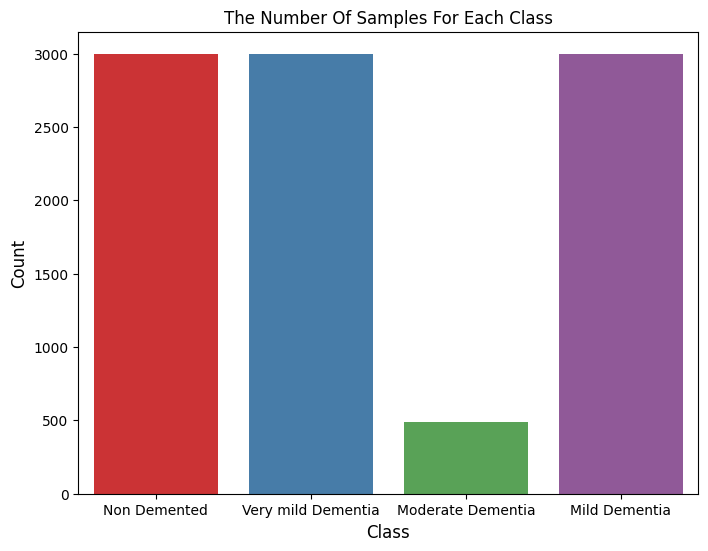

In [ ]:
import pandas as pd
df=pd.DataFrame({'image': images, 'label': labels})
df

plt.figure(figsize=(8,6))
ax = sns.countplot(x=df.label,palette='Set1')
ax.set_xlabel("Class",fontsize=12)
ax.set_ylabel("Count",fontsize=12)
plt.title('The Number Of Samples For Each Class',fontsize=12)
plt.show()

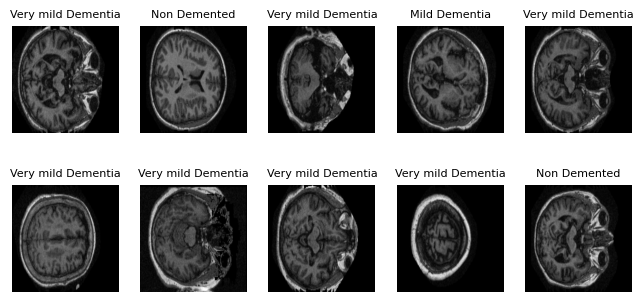

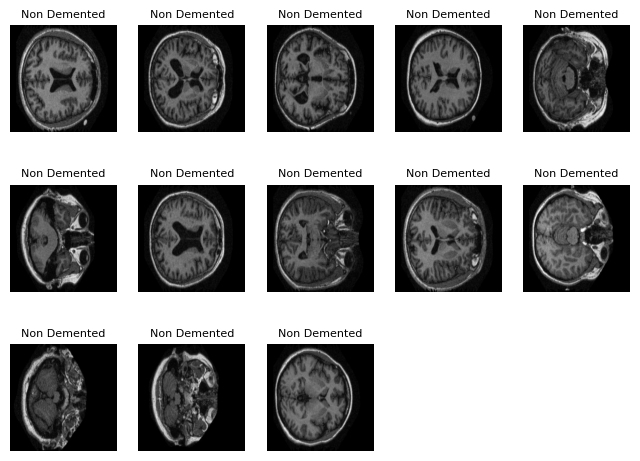

In [ ]:
plt.figure(figsize=(8,10))
for n,i in enumerate(np.random.randint(0,len(df),10)):
    plt.subplot(5,5,n+1)
    img=cv2.imread(df.image[i])
    img=cv2.resize(img,(256,256))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i],fontsize=8)

plt.figure(figsize=(8,10))
for n,i in enumerate([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]):
    plt.subplot(5,5,n+1)
    img=cv2.imread(df.image[i])
    img=cv2.resize(img,(256,256))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i],fontsize=8)

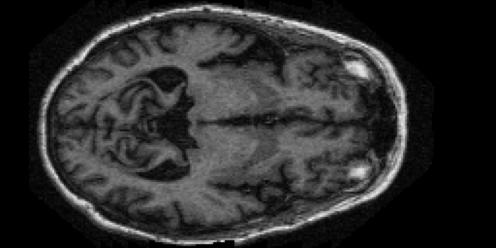

In [ ]:
PIL.Image.open(moderate_demented[100])

##Preprocessing

In [ ]:
encoder= OneHotEncoder(handle_unknown='ignore')
X = [['non_demented',0],['mild_demented',1],['moderate_demented',2],['very_mild_moderate',3]]
encoder.fit(X)
encoder.categories_

[array(['mild_demented', 'moderate_demented', 'non_demented',
        'very_mild_moderate'], dtype=object),
 array([0, 1, 2, 3], dtype=object)]

In [ ]:
encoder.fit([[0], [1], [2], [3]])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
data = []
result = []

for i in non_demented:
    img = Image.open(i)
    img = img.resize((256,256))
    img = np.array(img)
    if(img.shape == (256,256,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

for i in mild_demented:
    img = Image.open(i)
    img = img.resize((256,256))
    img = np.array(img)
    if(img.shape == (256,256,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

for i in moderate_demented:
    img = Image.open(i)
    img = img.resize((256,256))
    img = np.array(img)
    if(img.shape == (256,256,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())

for i in very_mild_demented:
    img = Image.open(i)
    img = img.resize((256,256))
    img = np.array(img)
    if(img.shape == (256,256,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

In [ ]:
#format
X = np.array(data)
print(X.shape)

(9488, 256, 256, 3)


In [ ]:
#format
y=np.array(result)
y=y.reshape(X.shape[0],4)
y=np.argmax(y, axis=1)
y

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
# #split into training, testing, and validation sets
# X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.3,random_state=42, shuffle = True)
# X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42, shuffle = True)

#split into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.3,random_state=42, shuffle = True)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42, shuffle = True)

# One-hot encode the target variables
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=4)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, num_classes=4)

In [ ]:
print(y_test_one_hot[200])
print(y_test[200])

[0. 0. 0. 1.]
3


#Models

In [ ]:
# -------
# imports
# -------
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import cv2
from tensorflow.keras import layers, models, regularizers

##🟨 Model #1 (edges)
This model is accurate, but focuses on the edged rather than real features associated with medical diagnoses

In [ ]:
# -------
# ORIGINAL RESNET
# -------

def   (inputs, filters, kernel_size=3, stride=1):
    """
    Basic residual block with two conv layers and a skip connection.
    """
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)

    # If the input shape is different from the output shape (due to strides),
    # we project the input using a 1x1 conv to match dimension.
    if stride != 1 or inputs.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=stride, padding='same')(inputs)
        shortcut = layers.BatchNormalization()(shortcut)
    else:
        shortcut = inputs

    out = layers.add([x, shortcut])
    out = layers.ReLU()(out)
    return out

# ------------------------------------------------------------
#Build model similar to ResNet by duplicating the blocks
# ------------------------------------------------------------

def build_resnet(input_shape=(256, 256, 3), num_classes=4):
    inputs = layers.Input(shape=input_shape)

    #data augmentation in built into the model
    x = layers.RandomFlip("horizontal")(inputs)
    x = layers.RandomRotation(0.1)(x)
    x = layers.RandomContrast(0.1)(x)

    # Initial conv + BN
    x = layers.Conv2D(256, 3, strides=1, padding='same', name='initial_conv')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Stack of residual blocks
    # Example: 3 stages with 2 blocks each (small for demonstration).
    # Each stage we increase filters and possibly stride.
    filters_list = [32, 64, 128]
    for i, f in enumerate(filters_list):
        stride = 2 if i > 0 else 1   # downsample after first stage
        # First block in stage
        x = resnet_block(x, filters=f, stride=stride)
        # Second block in stage
        x = resnet_block(x, filters=f, stride=1)

    # Global average pooling & dense for classification
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs, name='CustomResNet')
    return model

##🟩 Model #2 (larger, center features)
This model has batter and more consistent accuracy, and focuses on real features rather than the edges

In [ ]:
# -------
# BETTER RESNET
# -------

def resnet_block(inputs, filters, kernel_size=3, stride=1, weight_decay=1e-4, dropout_rate=0.0):
    """
    Residual block with optional downsampling and dropout.
    """
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same',
                      kernel_regularizer=regularizers.l2(weight_decay))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    if dropout_rate > 0:
        x = layers.Dropout(dropout_rate)(x)

    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same',
                      kernel_regularizer=regularizers.l2(weight_decay))(x)
    x = layers.BatchNormalization()(x)

    if stride != 1 or inputs.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=stride, padding='same',
                                 kernel_regularizer=regularizers.l2(weight_decay))(inputs)
        shortcut = layers.BatchNormalization()(shortcut)
    else:
        shortcut = inputs

    out = layers.add([x, shortcut])
    out = layers.ReLU()(out)
    return out

def build_resnet(input_shape=(256, 256, 3), num_classes=4):
    inputs = layers.Input(shape=input_shape)

    #data augmentation in built into the model
    x = layers.RandomFlip("horizontal")(inputs)
    x = layers.RandomRotation(0.1)(x)
    x = layers.RandomContrast(0.1)(x)

    x = layers.Rescaling(1./255)(x)
    x = layers.BatchNormalization()(x)

    # Start with smaller number of filters
    x = layers.Conv2D(32, 7, strides=2, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    # Stage-wise ResNet blocks
    filter_configs = [
        (32, 2),
        (64, 2),
        (128, 2),
        (256, 2)
    ]
    for i, (filters, blocks) in enumerate(filter_configs):
        for j in range(blocks):
            stride = 2 if j == 0 and i != 0 else 1  # downsample only at first block of each stage (except stage 0)
            x = resnet_block(x, filters, stride=stride, dropout_rate=0.2)

    # Final layers
    x = layers.SpatialDropout2D(0.2)(x)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs, name='ImprovedCustomResNet')
    return model


#Train the model

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

if __name__ == "__main__":
    # Build and compile the model
    model = build_resnet(input_shape=(256, 256, 3), num_classes=4)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='categorical_crossentropy', # Keep categorical_crossentropy since we will use one-hot encoding
        metrics=['accuracy']
    )
    model.summary()

    early_stopping=EarlyStopping(
      monitor="val_loss",
      patience=8, #set to low number for quick testing purposes; change to higher number later
      verbose=0,
      mode="auto",
      baseline=None,
      restore_best_weights=True,
      start_from_epoch=0,
    )

    reduce_lr = ReduceLROnPlateau(
      monitor='val_loss',
      factor=0.5,
      patience=5,
      verbose=1,
      min_lr=1e-6
    )

    # Train the model
    # model.fit(
    #     X_train, y_train_one_hot,
    #     validation_data=(X_val, y_val_one_hot),
    #     epochs=40, #set to low number for quick testing purposes; change to higher number later
    #     callbacks=[early_stopping, reduce_lr],
    #     batch_size=32
    # )

    #save the model
    #model.save('/content/drive/MyDrive/Research - Summer 2025/Models/model_2_optimized.keras')

    # Evaluate the model
    #test_loss, test_acc = model.evaluate(X_test, y_test_one_hot) # Use one-hot encoded y_test for evaluation
    #print(f"Test accuracy: {test_acc:.4f}")

Model: "ImprovedCustomResNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_flip         │ (None, 256, 256,  │          0 │ input_layer[0][0] │
│ (RandomFlip)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_rotation     │ (None, 256, 256,  │          0 │ random_flip[0][0] │
│ (RandomRotation)    │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_contrast     │ (None, 256, 256,  │          0 │ random_rotation[… │
│ (RandomContrast)    │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 256, 256,  │          0 │ random_contrast[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │         12 │ rescaling[0][0]   │
│ (BatchNormalizatio… │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      4,736 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ re_lu[0][0]       │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 64, 64,    │      9,248 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64, 64,    │          0 │ re_lu_1[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │      9,248 │ dropout[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 64, 64,    │          0 │ batch_normalizat

 Total params: 2,807,120 (10.71 MB)

 Trainable params: 2,802,314 (10.69 MB)

 Non-trainable params: 4,806 (18.77 KB)

In [ ]:
    pip install tf2onnx

INFO: pip is looking at multiple versions of onnx to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.17.2 requires protobuf>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=

In [ ]:
import tf2onnx
import tensorflow as tf

# Convert the model
spec = (tf.TensorSpec((None, 256, 256, 3), tf.float32, name="input"),)
output_path = "2improved_custom_resnet_debug.onnx"

# Export to ONNX
# Force inference mode to False (less fusion)
model_proto, _ = tf2onnx.convert.from_keras(
    model,
    input_signature=spec,
    opset=13,
    output_path="2improved_custom_resnet_debug.onnx",
    # Extra options:
    custom_ops=None,
    extra_opset=[],
    # fold_constants=False  # <-- prevent folding BN into Conv
)


from google.colab import files
files.download(output_path)

ERROR:tf2onnx.tfonnx:rewriter <function rewrite_constant_fold at 0x7a8479536ca0>: exception `np.cast` was removed in the NumPy 2.0 release. Use `np.asarray(arr, dtype=dtype)` instead.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming `model` is your Keras model
plot_model(
    model,
    to_file='resnet_architecture.png',
    show_shapes=True,       # display tensor shapes
    show_layer_names=True,  # include layer names
    expand_nested=True,     # expand nested models
    dpi=96
)

files.download('resnet_architecture.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Model statistical evaluation

In [ ]:
from tensorflow.keras.models import load_model

CLASSES = ['Non demented', 'Mild dementia', 'Moderate Dementia', 'Very mild dementia']

#import saved model from drive
model = load_model('/content/drive/MyDrive/Research - Summer 2025/Models/model_2_internal.keras')

In [ ]:
#more metrics
from sklearn.metrics import classification_report, confusion_matrix

# Predict class labels
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

print(y_pred_probs[:10])
print(y_pred[:10])
print(y_true[:10])

# Classification report
print(classification_report(y_true, y_pred, target_names=CLASSES))

45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step
[[5.9774692e-07 7.8625435e-01 1.8629683e-03 2.1188217e-01]
 [1.4577489e-08 9.9988717e-01 9.2759592e-08 1.1267202e-04]
 [9.9999732e-01 1.3965092e-08 1.0431956e-08 2.6649991e-06]
 [8.5366133e-05 5.8024894e-03 1.1678610e-04 9.9399531e-01]
 [9.9999434e-01 2.3679760e-08 2.1368891e-09 5.6233453e-06]
 [7.8197617e-09 9.9927443e-01 5.6480030e-06 7.2002184e-04]
 [8.2578181e-06 9.9311280e-01 2.6238772e-06 6.8763555e-03]
 [1.7527911e-05 9.9924821e-01 3.8694907e-06 7.3058187e-04]
 [4.9697761e-08 9.9971068e-01 8.6940595e-08 2.8914705e-04]
 [2.7026003e-04 3.4519183e-04 1.1427863e-05 9.9937308e-01]]
[1 1 0 3 0 1 1 1 1 3]
[1 1 0 3 0 1 1 1 1 3]
                    precision    recall  f1-score   support

      Non demented       0.98      0.89      0.93       489
     Mild dementia       0.94      0.98      0.96       442
 Moderate Dementia       1.00      0.91      0.95        75
Very mild dementia       0.89      0.96      0.92       418

          accuracy    

In [ ]:
print(np.sum(y_pred_probs[0]))

0.99999994


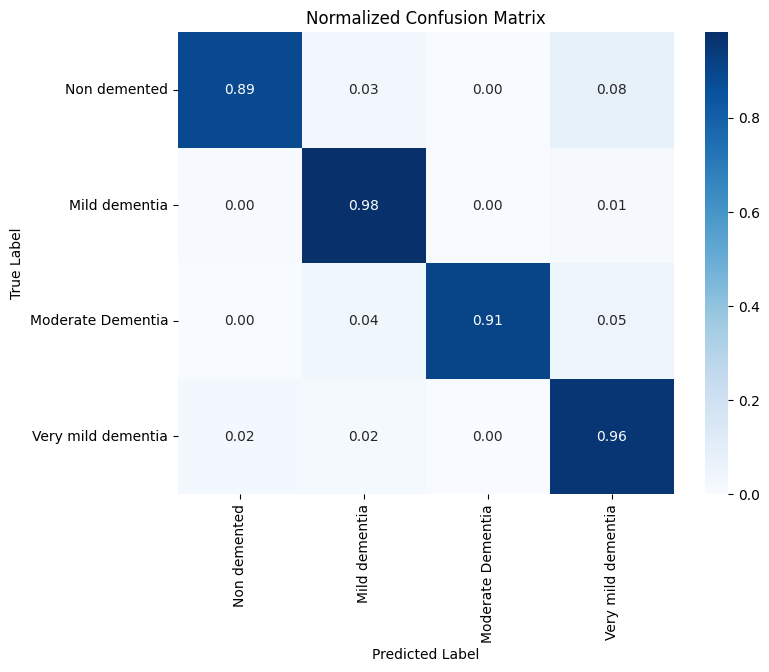

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", xticklabels=CLASSES, yticklabels=CLASSES, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix")
plt.show()

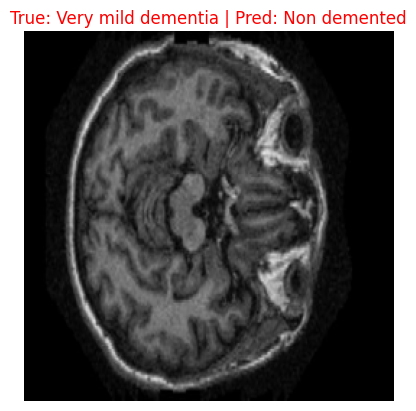

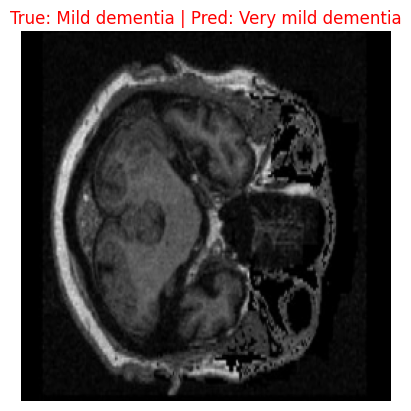

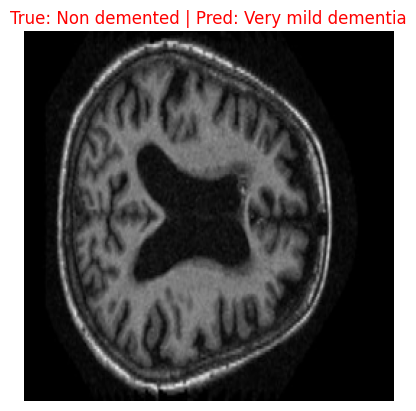

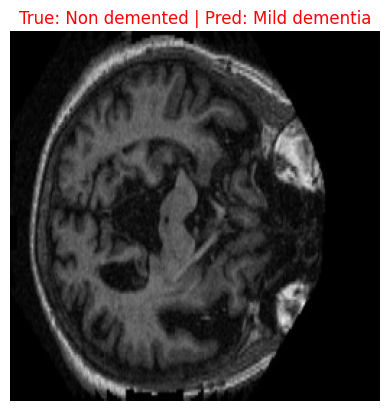

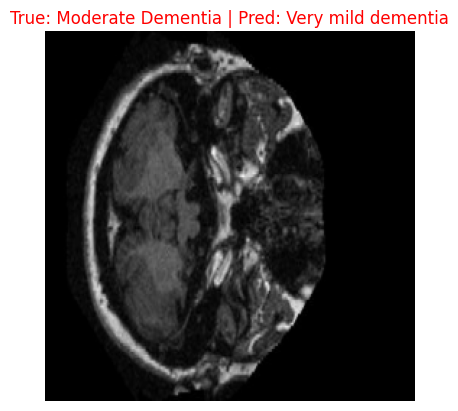

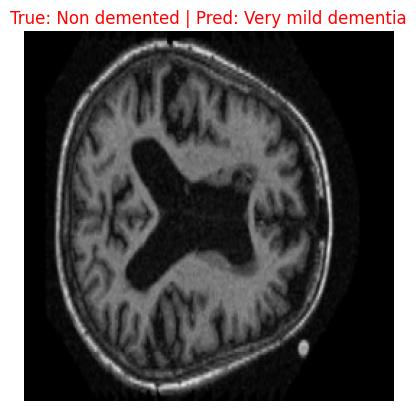

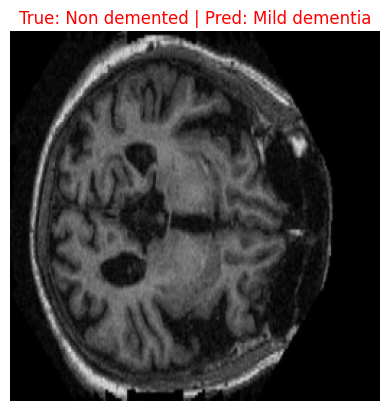

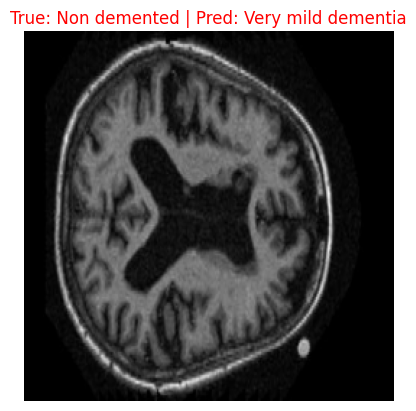

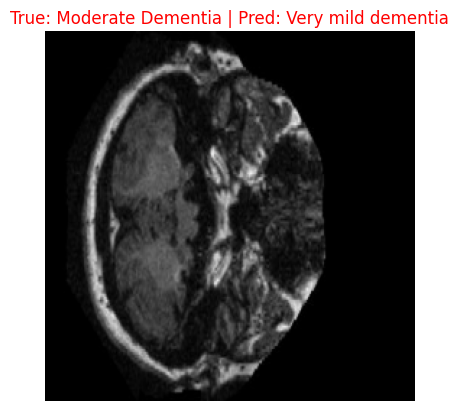

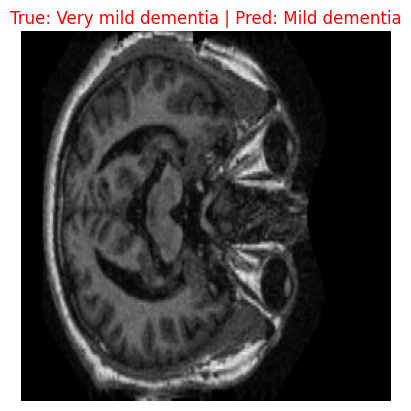

In [ ]:
wrong_idx = np.where(y_pred != y_true)[0]
for i in wrong_idx[:10]:
    plt.imshow(X_test[i])
    plt.title(f"True: {CLASSES[y_true[i]]} | Pred: {CLASSES[y_pred[i]]}", color="red")
    plt.axis("off")
    plt.show()


#Grad-CAM

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    """
    Creates Grad-CAM heatmap for the given model and image array.
    :param img_array: A single sample in shape (1, H, W, 3).
    :param model: A Keras model.
    :param last_conv_layer_name: The name of the last convolution layer in the model.
    :param pred_index: Class index to compute Grad-CAM for; if None, uses the max predicted class.
    :return: A 2D numpy array (heatmap) of shape (H, W).
    """
    # Create a sub-model that maps the input to the activations of the chosen layer & the outputs
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        (conv_outputs, predictions) = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Get gradients of class output wrt conv_outputs
    grads = tape.gradient(class_channel, conv_outputs)
    # Global average pooling on the gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel by corresponding gradients
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + 1e-10)
    return heatmap.numpy()


def display_gradcam(original_img, heatmap, actual_label, predicted_label, alpha=0.4, title_color='black'):
    """
    Overlays Grad-CAM heatmap on original image and returns the result as a plot-ready image.
    """
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    if original_img.max() > 1.0:
        original_img = original_img / 255.0

    superimposed = (heatmap / 255.0) * alpha + original_img
    superimposed = np.clip(superimposed, 0, 1)

    title_color = 'green' if actual_label == predicted_label else 'red'

    return original_img, superimposed, title_color

45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9991 - loss: 0.1193
Test accuracy: 0.9986
Using Conv2D layer: conv2d_42


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_3']]
Received: inputs=Tensor(shape=(1, 256, 256, 3))
  warnings.warn(msg)


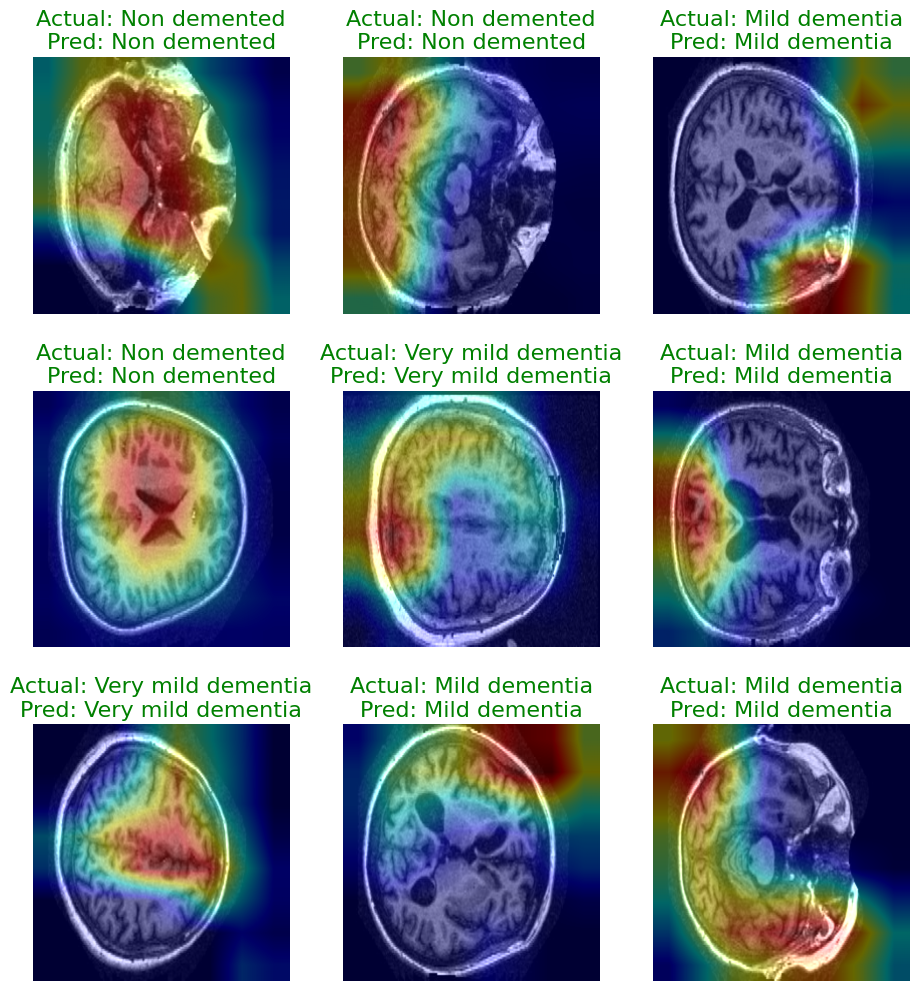

In [ ]:
from tensorflow.keras.models import load_model
from PIL import Image

CLASSES = ['Non demented', 'Mild dementia', 'Moderate Dementia', 'Very mild dementia']

#import saved model from drive
model = load_model('/content/drive/MyDrive/Research - Summer 2025/Models/model_2_optimized.keras')


def get_last_conv_layer(model):
    """
    Automatically detects the last Conv2D layer name from the model.
    """
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model!")


def gradcam_batch_visualizer(model, X, y_one_hot, num_images=6, cols=3, last_conv_layer_name=None):
    """
    Displays a grid of Grad-CAM outputs from random samples with improved spacing and larger text.
    """
    if last_conv_layer_name is None:
        last_conv_layer_name = get_last_conv_layer(model)
    print(f"Using Conv2D layer: {last_conv_layer_name}")

    rows = (num_images + cols - 1) // cols
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))  # Slightly reduced figsize for tighter layout

    axs = axs.flatten() if num_images > 1 else [axs]
    selected_indices = np.random.choice(len(X), size=num_images, replace=False)

    for i, idx in enumerate(selected_indices):
        img_array = X[idx:idx + 1]
        label = y_one_hot[idx]
        #label = np.argmax(y_one_hot[idx])

        preds = model.predict(img_array, verbose=0)
        #print(preds)
        pred_label = np.argmax(preds[0])

        heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=pred_label)
        #print(label)
        original_img, superimposed_img, title_color = display_gradcam(X[idx], heatmap, CLASSES[label], CLASSES[pred_label])

        axs[i].imshow(superimposed_img)
        axs[i].set_title(
            f"Actual: {CLASSES[label]}\nPred: {CLASSES[pred_label]}",
            color=title_color,
            fontsize=16  # Larger text
        )
        axs[i].axis('off')

    # Turn off unused subplots
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    # Tighter layout control
    plt.subplots_adjust(wspace=0.00, hspace=0.3)  # Reduce whitespace

    #download the plot as a tiff
    plt.savefig('FINAL_model_2_gradcam.tiff', format='tiff', dpi=300)  # dpi optional



    plt.show()

#print model accuracy on test set and confusion matrix
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
print(f"Test accuracy: {test_acc:.4f}")

#call everything
gradcam_batch_visualizer(model, X_test, y_test, num_images=9, cols=3)

In [ ]:
from PIL import Image

# Load and save with compression
img = Image.open('/content/model_1_gradcam.tiff')
img.save('small_model_1_gradcam.tiff', compression='tiff_lzw')

Using Conv2D layer: conv2d_42


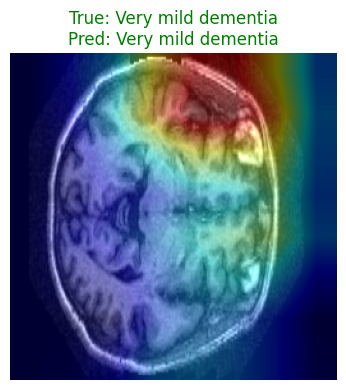

In [ ]:
# ------
# use gradcam_batch_visualizer on a single main dataset image
# ------

test_image_main = '/kaggle/input/oasis-dataset/input/Very mild Dementia/OAS1_0022_MR1_mpr-3_122.jpg'
test_image_main = cv2.imread(test_image_main)
test_image_main = cv2.resize(test_image_main, (256, 256))

gradcam_batch_visualizer(model, np.array([test_image_main]), np.array([3]), num_images=1, cols=1)

In [ ]:
# ------
# use gradcam_batch_visualizer on a single main dataset image
# ------

test_image_external = preprocess_external_validation_image('/kaggle/input/alzheimer-mri-4-classes-dataset/Alzheimer_MRI_4_classes_dataset/NonDemented/18 (79).jpg')
gradcam_batch_visualizer(model, np.array([test_image_external]), np.array([0]), num_images=1, cols=1)

NameError: name 'preprocess_external_validation_image' is not defined

#External vaidation



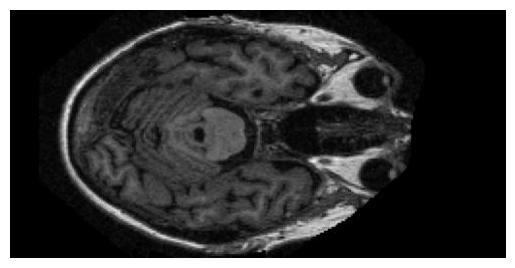

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Very mild dementia
[[6.9957796e-06 2.4016286e-05 4.6637121e-11 9.9996901e-01]]
Confidence score: 0.999969


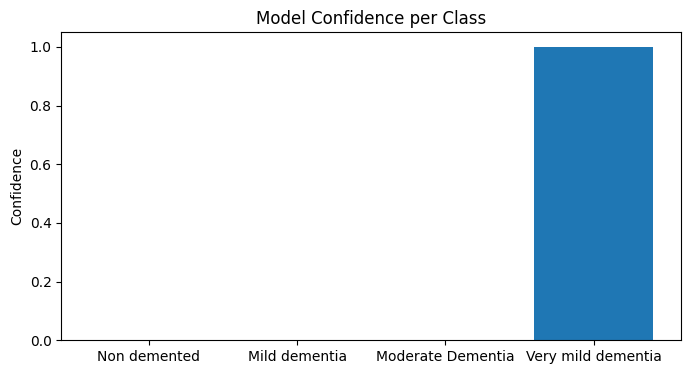

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_3']]
Received: inputs=Tensor(shape=(1, 256, 256, 3))
  warnings.warn(msg)


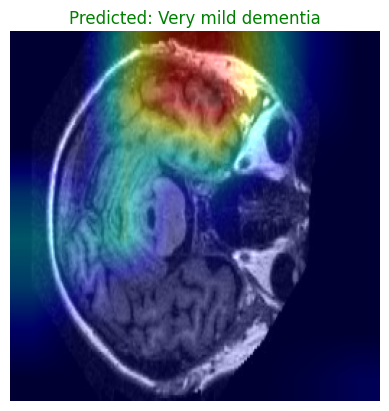

In [ ]:
external_control = '/content/drive/MyDrive/Research - Summer 2025/External validation images/non-demented.png'
external_very_mild = '/kaggle/input/oasis-dataset/input/Very mild Dementia/OAS1_0003_MR1_mpr-1_130.jpg'

def get_last_conv_layer(model):
    """
    Automatically detects the last Conv2D layer name from the model.
    """
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model!")

def display_and_predict_image(image_path, model, actual_label):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    img_np = np.array(image)
    resized_img_np = cv2.resize(img_np, (256, 256))
    predictions = model.predict(np.expand_dims(resized_img_np, axis=0))
    predicted_class = CLASSES[np.argmax(predictions)]
    print(predicted_class)
    print(predictions)
    print("Confidence score: " + str(np.max(predictions)))

    # Plot the confidence scores for each class
    plt.figure(figsize=(8, 4))
    plt.bar(CLASSES, predictions.flatten())
    plt.ylabel("Confidence")
    plt.title("Model Confidence per Class")
    plt.show()


    #grad-cam heatmap overlay
    last_conv_layer_name = get_last_conv_layer(model)
    heatmap = make_gradcam_heatmap(np.expand_dims(resized_img_np, axis=0), model, last_conv_layer_name)
    # Assuming you know the true label for this external image,
    # replace 'predicted_class' with the actual true label if available for coloring the title correctly.
    # For now, using predicted_class for both true and predicted labels in display_gradcam
    # as the true label is not explicitly provided for the external image in this function.
    original_img, superimposed_img, title_color = display_gradcam(resized_img_np, heatmap, actual_label, predicted_class)
    plt.imshow(superimposed_img)
    plt.title(f"Predicted: {predicted_class}", color=title_color)
    plt.axis('off')
    plt.show()

display_and_predict_image(external_very_mild, model, "Very mild dementia")

#Medical professional email content

Using Conv2D layer: conv2d_42


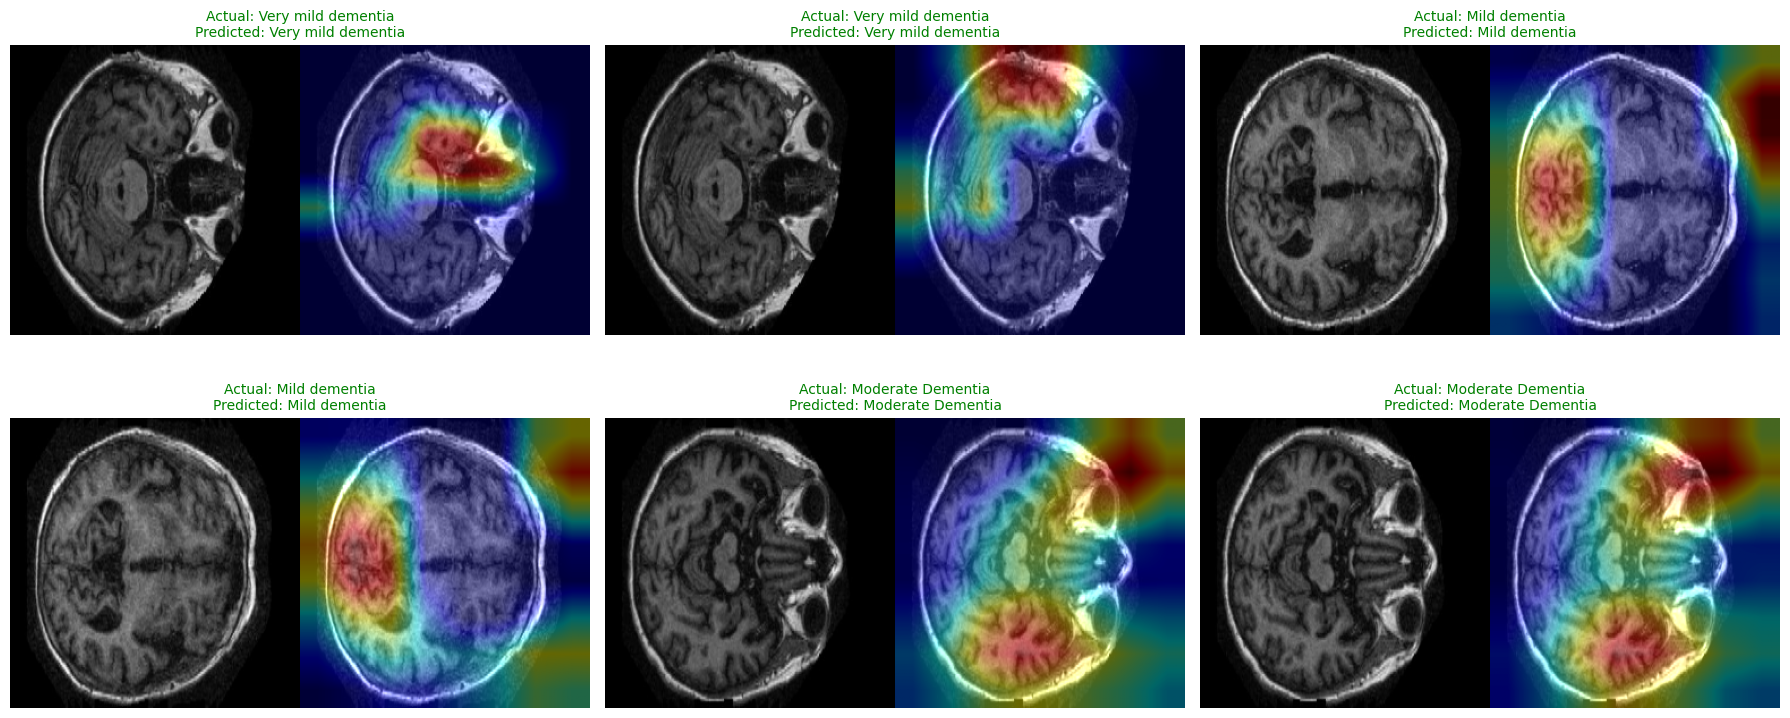

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import tensorflow as tf # Import tensorflow

# File paths
very_mild_1 = '/kaggle/input/oasis-dataset/input/Very mild Dementia/OAS1_0003_MR1_mpr-1_130.jpg'
very_mild_2 = '/kaggle/input/oasis-dataset/input/Very mild Dementia/OAS1_0003_MR1_mpr-2_130.jpg'
mild_1 = '/kaggle/input/oasis-dataset/input/Mild Dementia/OAS1_0028_MR1_mpr-1_130.jpg'
mild_2 = '/kaggle/input/oasis-dataset/input/Mild Dementia/OAS1_0028_MR1_mpr-2_130.jpg'
moderate_1 = '/kaggle/input/oasis-dataset/input/Moderate Dementia/OAS1_0308_MR1_mpr-1_130.jpg'
moderate_2 = '/kaggle/input/oasis-dataset/input/Moderate Dementia/OAS1_0308_MR1_mpr-2_130.jpg'

# List of image paths and titles
image_paths = [very_mild_1, very_mild_2, mild_1, mild_2, moderate_1, moderate_2]
titles = [
    'Very Mild Dementia 1',
    'Very Mild Dementia 2',
    'Mild Dementia 1',
    'Mild Dementia 2',
    'Moderate Dementia 1',
    'Moderate Dementia 2'
]


# Define Grad-CAM related functions
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    """
    Creates Grad-CAM heatmap for the given model and image array.
    :param img_array: A single sample in shape (1, H, W, 3).
    :param model: A Keras model.
    :param last_conv_layer_name: The name of the last convolution layer in the model.
    :param pred_index: Class index to compute Grad-CAM for; if None, uses the max predicted class.
    :return: A 2D numpy array (heatmap) of shape (H, W).
    """
    # Create a sub-model that maps the input to the activations of the chosen layer & the outputs
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        (conv_outputs, predictions) = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Get gradients of class output wrt conv_outputs
    grads = tape.gradient(class_channel, conv_outputs)
    # Global average pooling on the gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel by corresponding gradients
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + 1e-10)
    return heatmap.numpy()


def display_gradcam(original_img, heatmap, actual_label, predicted_label, alpha=0.4, title_color='black'):
    """
    Overlays Grad-CAM heatmap on original image and returns the result as a plot-ready image.
    """
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    if original_img.max() > 1.0:
        original_img = original_img / 255.0

    superimposed = (heatmap / 255.0) * alpha + original_img
    superimposed = np.clip(superimposed, 0, 1)

    title_color = 'green' if actual_label == predicted_label else 'red'

    return original_img, superimposed, title_color

def get_last_conv_layer(model):
    """
    Automatically detects the last Conv2D layer name from the model.
    """
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model!")

def gradcam_batch_visualizer(model, X, y, num_images=6, cols=3, last_conv_layer_name=None):
    """
    Displays a grid of images where each cell shows:
    - Left: Original image
    - Right: Grad-CAM overlay
    Titles are colored based on prediction correctness.
    """
    if last_conv_layer_name is None:
        last_conv_layer_name = get_last_conv_layer(model)
    print(f"Using Conv2D layer: {last_conv_layer_name}")

    rows = (num_images + cols - 1) // cols
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))

    axs = axs.flatten()
    selected_indices = np.arange(num_images)  # Use first num_images in order

    for i, idx in enumerate(selected_indices):
        img_array = X[idx:idx + 1]
        label = y[idx]

        preds = model.predict(img_array, verbose=0)
        pred_label = np.argmax(preds[0])

        # Create heatmap and Grad-CAM image
        heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=pred_label)
        original_img, gradcam_img, title_color = display_gradcam(X[idx], heatmap, CLASSES[label], CLASSES[pred_label])

        # Concatenate original and Grad-CAM side-by-side
        concat_img = np.concatenate([original_img, gradcam_img], axis=1)

        axs[i].imshow(concat_img)
        axs[i].set_title(f"Actual: {CLASSES[label]}\nPredicted: {CLASSES[pred_label]}", color=title_color, fontsize=10)
        axs[i].axis('off')

    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()



# Prepare images for Grad-CAM visualization
def prep_img_from_path(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
  img = cv2.resize(img, (256, 256)) # Resize to model input shape
  return img

images_for_gradcam = [prep_img_from_path(path) for path in image_paths]
images_np = np.array(images_for_gradcam)

# Define labels for these images
# Assuming the order in image_paths corresponds to the labels:
# Very mild, Very mild, Mild, Mild, Moderate, Moderate
# The numerical labels corresponding to CLASSES = ['Non demented', 'Mild dementia', 'Moderate Dementia', 'Very mild dementia']
# are: 3 (Very mild), 1 (Mild), 2 (Moderate).
# So the labels for the images should be: [3, 3, 1, 1, 2, 2]
labels_np = np.array([3, 3, 1, 1, 2, 2])


# Use gradcam_batch_visualizer on the prepared images
# Ensure model and CLASSES are defined in previous cells and those cells are executed.
# Also ensure make_gradcam_heatmap and display_gradcam functions are defined (e.g., in cell 7jvM_3rvvRBc)
gradcam_batch_visualizer(model, images_np, labels_np, num_images=6, cols=3)